<a href="https://colab.research.google.com/github/SumiaAlbalushi/Data.Code/blob/main/Copy_of_SVM_KNN_Random_orest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm, ensemble, neighbors, linear_model



In [ ]:
# load digits datasets

digits = datasets.load_digits()
x = digits.data
y = digits.target

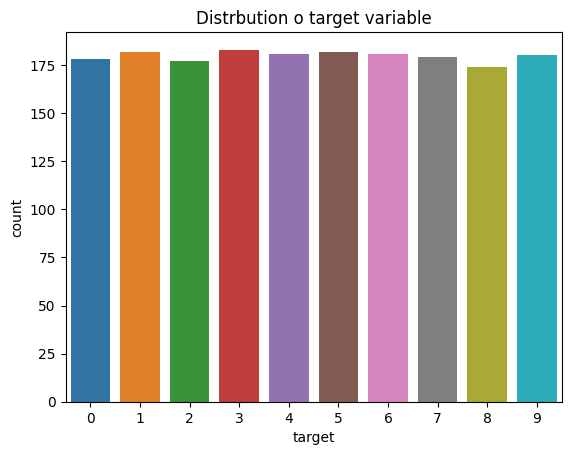

In [ ]:
# convert tearge to dataframe for seaborn
df_y = pd.DataFrame(y, columns=["target"])

sns.countplot(x="target", data=df_y)
plt.title("Distrbution o target variable")
plt.show()

In [ ]:
# split the data into training / testing sets
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Define the models
models ={
    "SVM": svm.SVC(kernel='linear', C=1, random_state=42),
    "Random Forest": ensemble.RandomForestClassifier(random_state=42),
    "KNN": neighbors.KNeighborsClassifier(),
    "Logistic Regression": linear_model.LogisticRegression(max_iter=1000, random_state=42)

}


In [ ]:
# Train the model and calculate the scores
scores_train_val = {}
scores_cv = {}

for model_name in models:
  model = models[model_name]
  model.fit(x_train, y_train)
  scores_train_val[model_name]=model.score(x_test, y_test)
  scores_cv[model_name] = cross_val_score(model, x, y, cv=10).mean

  print(f"Train / Validation scores: {scores_train_val}")
  print(f" cross Validation scores: {scores_cv}")



Train / Validation scores: {'SVM': 0.9777777777777777}
 cross Validation scores: {'SVM': <built-in method mean of numpy.ndarray object at 0x7ce0766113b0>}
Train / Validation scores: {'SVM': 0.9777777777777777, 'Random Forest': 0.9722222222222222}
 cross Validation scores: {'SVM': <built-in method mean of numpy.ndarray object at 0x7ce0766113b0>, 'Random Forest': <built-in method mean of numpy.ndarray object at 0x7ce0766b7d50>}
Train / Validation scores: {'SVM': 0.9777777777777777, 'Random Forest': 0.9722222222222222, 'KNN': 0.9861111111111112}
 cross Validation scores: {'SVM': <built-in method mean of numpy.ndarray object at 0x7ce0766113b0>, 'Random Forest': <built-in method mean of numpy.ndarray object at 0x7ce0766b7d50>, 'KNN': <built-in method mean of numpy.ndarray object at 0x7ce076677e70>}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Train / Validation scores: {'SVM': 0.9777777777777777, 'Random Forest': 0.9722222222222222, 'KNN': 0.9861111111111112, 'Logistic Regression': 0.9722222222222222}
 cross Validation scores: {'SVM': <built-in method mean of numpy.ndarray object at 0x7ce0766113b0>, 'Random Forest': <built-in method mean of numpy.ndarray object at 0x7ce0766b7d50>, 'KNN': <built-in method mean of numpy.ndarray object at 0x7ce076677e70>, 'Logistic Regression': <built-in method mean of numpy.ndarray object at 0x7ce0766114d0>}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
# convert scores to dataframe for seaborn
df_scores_train_val = pd. DataFrame(scores_train_val.items(), columns=["Model" ,"Score"])
df_scores_train_val["Method"] = "Train / validation"

df_scores_cv = pd.DataFrame(scores_cv.items(),columns=["Model" ,"Score"])
df_scores_cv["Method"] = "cross validation"

#concatenate dataframe and plot

df_scores = pd.concat([df_scores_train_val , df_scores_cv])

plt.figure(figsize=(12,6))
sns.barplot(x="Model", y = "Score", hue="Method", data=df_scores)
plt.title('comparison of train / validation and cross validation score')
plt.show()


NameError: ignored